SearchResult containing 7 data products.

 #     mission     year  author exptime  target_name  distance
                                   s                   arcsec 
--- -------------- ---- ------- ------- ------------- --------
  0 TESS Sector 14 2019 TESScut    1426 TIC 294179385      0.0
  1 TESS Sector 15 2019 TESScut    1426 TIC 294179385      0.0
  2 TESS Sector 16 2019 TESScut    1426 TIC 294179385      0.0
  3 TESS Sector 41 2021 TESScut     475 TIC 294179385      0.0
  4 TESS Sector 54 2022 TESScut     475 TIC 294179385      0.0
  5 TESS Sector 55 2022 TESScut     475 TIC 294179385      0.0
  6 TESS Sector 56 2022 TESScut     158 TIC 294179385      0.0


C:\Users\tyler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 7 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\tyler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\collections.py:264: LightkurveWarning: Some but not all of the light curves in the collection appear to be normalized. You may wish to use `normalize=True` to ensure all are normalized.
  warnings.warn(


SearchResult containing 9 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 14 2019       QLP    1800   294179385      0.0
  1 TESS Sector 15 2019       QLP    1800   294179385      0.0
  2 TESS Sector 16 2019       QLP    1800   294179385      0.0
  3 TESS Sector 41 2021      SPOC     120   294179385      0.0
  4 TESS Sector 41 2021 TESS-SPOC     600   294179385      0.0
  5 TESS Sector 41 2021       QLP     600   294179385      0.0
  6 TESS Sector 54 2022      SPOC     120   294179385      0.0
  7 TESS Sector 55 2022      SPOC     120   294179385      0.0
  8 TESS Sector 56 2022      SPOC     120   294179385      0.0


C:\Users\tyler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\collections.py:213: LightkurveWarning: The following columns will be excluded from stitching because the column types are incompatible: {'sap_flux', 'sap_bkg', 'sap_bkg_err'}
  warnings.warn(


2.67976797679768 d


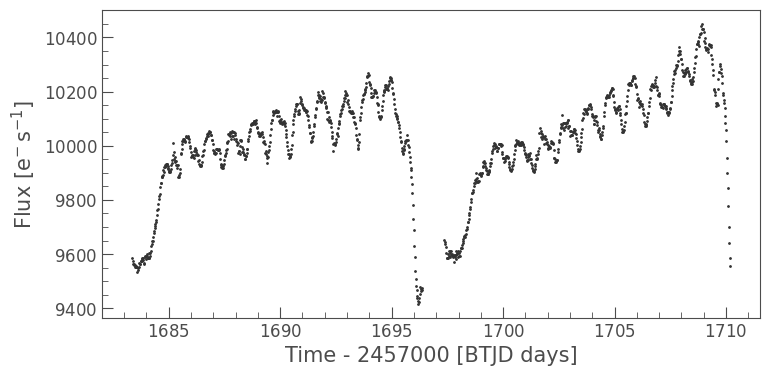

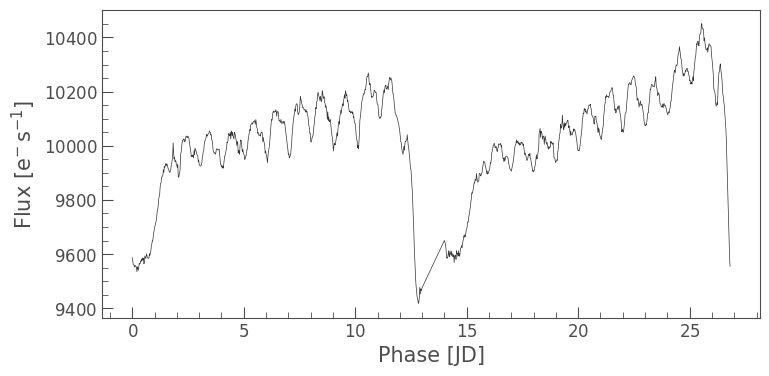

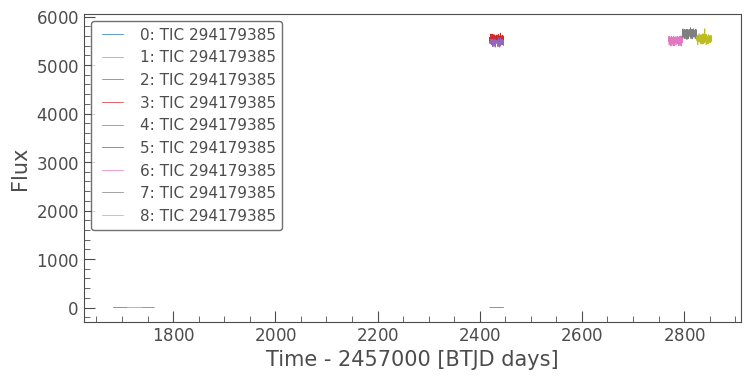

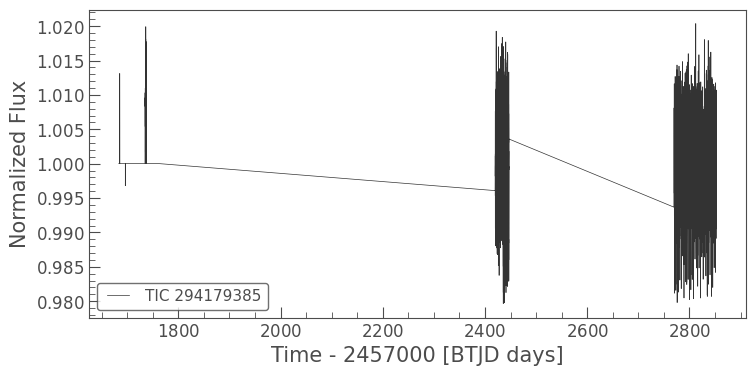

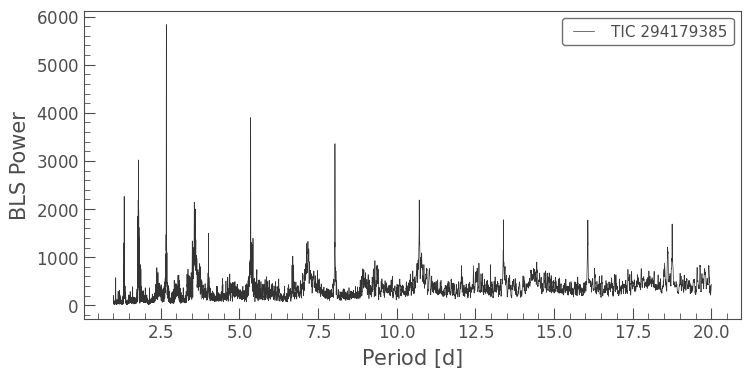

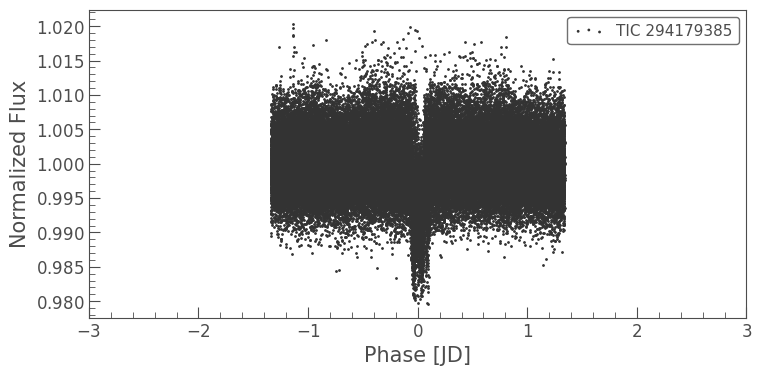

In [17]:
import lightkurve as lk
import matplotlib.pyplot as plt
import matplotlib_inline as inline
import numpy as np

first_try = lk.search_tesscut("TIC 294179385")
print(first_try)
hope = first_try.download()

hopev = hope.to_lightcurve()
hopev.scatter().plot();
hopev.fold(1970).plot();

search_result = lk.search_lightcurve("TIC 294179385")
lc_collection = search_result.download_all()
lc_collection.plot()

print(search_result)

lc = lc_collection.stitch().flatten(window_length=9010).remove_outliers()
lc.plot();

period = np.linspace(1, 20, 10000)
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

print(planet_b_period)

ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).remove_outliers().scatter()
ax.set_xlim(-3, 3);